# KNN

-> It is supervised machine learning that is use for classification and regression problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\online\OneDrive\Desktop\Data analysis\Datasets\Breast_cancer_dataset.csv")
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


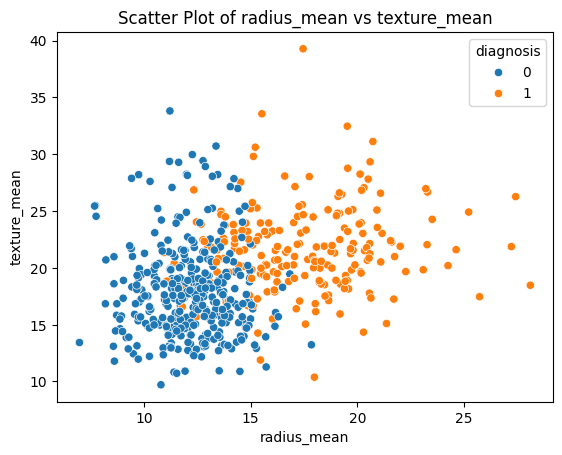

In [63]:
sns.scatterplot(x='radius_mean' , y='texture_mean' , data=df , hue='diagnosis')
plt.title("Scatter Plot of radius_mean vs texture_mean")
plt.show()

In [5]:
df['diagnosis']=df['diagnosis'].map({'M':1 , 'B':0})
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
Data = df.drop(columns=['id', 'Unnamed: 32'])
Data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


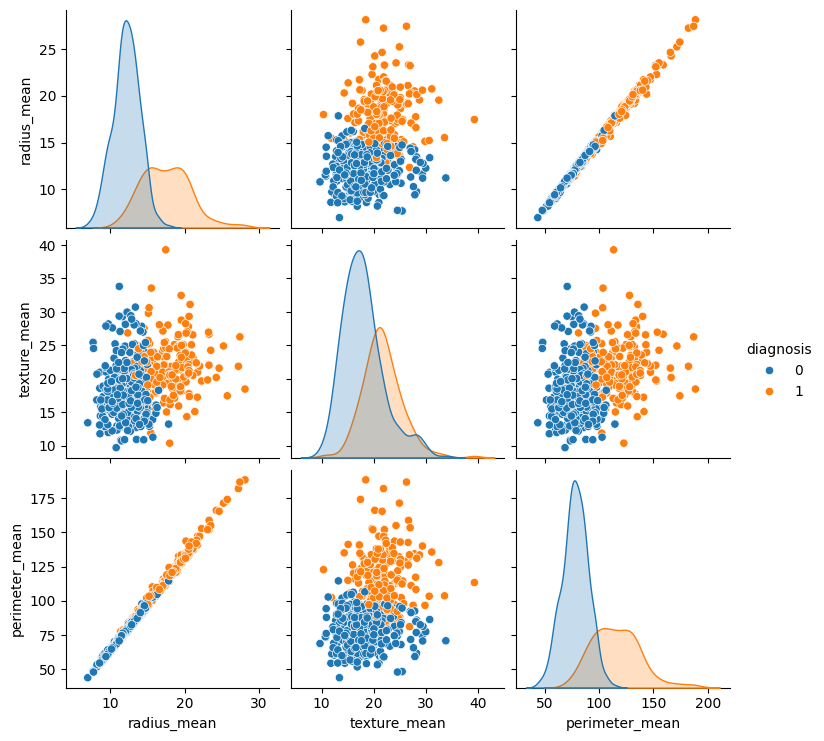

In [65]:
sns.pairplot(Data.iloc[:,0:4] , hue='diagnosis')
plt.show()

In [10]:
count=Data['diagnosis'].value_counts()
count

diagnosis
0    357
1    212
Name: count, dtype: int64

C:\Users\online\AppData\Local\Temp\ipykernel_13832\2668429765.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a =sns.countplot(x='diagnosis', data=Data , width=0.4 , palette='rocket')


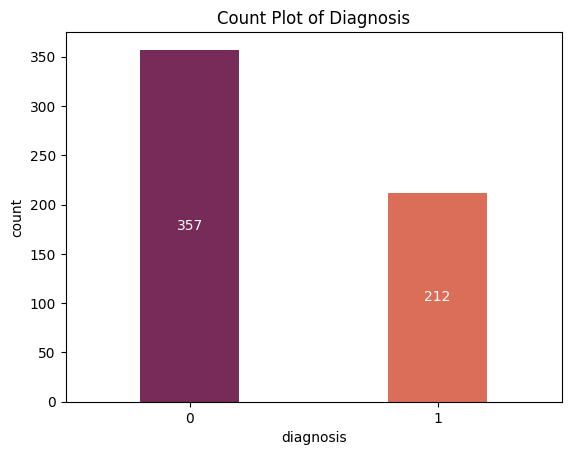

In [66]:

a =sns.countplot(x='diagnosis', data=Data , width=0.4 , palette='rocket')
plt.title("Count Plot of Diagnosis")
for i in a.containers:
    a.bar_label(i , label_type='center',color = 'w')

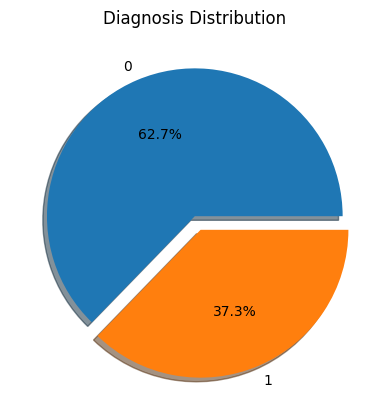

In [67]:
plt.pie(count.values,labels=count.index , autopct='%0.1f%%' , shadow=True , explode=(0,0.1))
plt.title("Diagnosis Distribution")
plt.show()

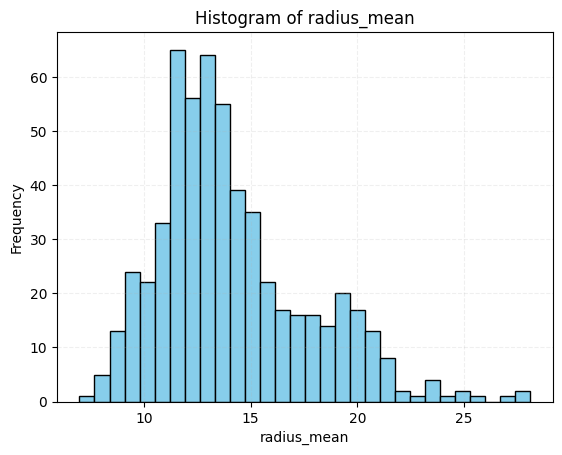

In [37]:
plt.hist(Data['radius_mean'] , bins=30 , color='skyblue' , edgecolor='black')
plt.title("Histogram of radius_mean")
plt.xlabel("radius_mean")
plt.ylabel("Frequency")
plt.grid(True , linestyle = '--' , alpha = 0.2)
plt.show()

C:\Users\online\AppData\Local\Temp\ipykernel_13832\72601341.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df["texture_mean"], shade=True)


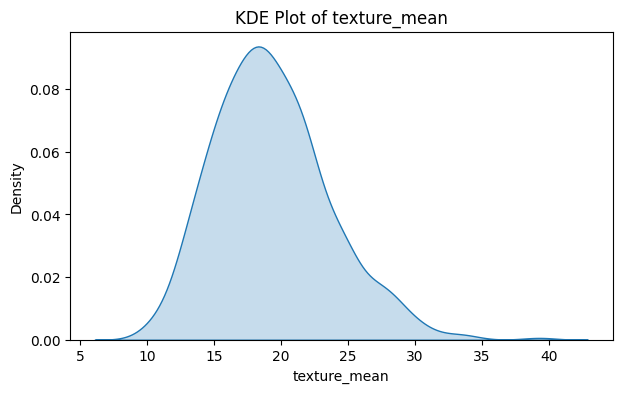

In [44]:
plt.figure(figsize=(7,4))
sns.kdeplot(x=df["texture_mean"], shade=True)
plt.title("KDE Plot of texture_mean")
plt.show()


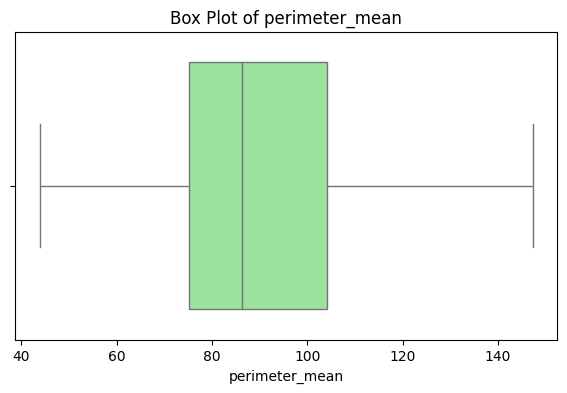

In [48]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["perimeter_mean"] , color='lightgreen' ,showfliers=False)
plt.title("Box Plot of perimeter_mean")
plt.show()


C:\Users\online\AppData\Local\Temp\ipykernel_13832\1071306959.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a =sns.countplot(x='diagnosis', data=Data , width=0.4 , palette='rocket')
C:\Users\online\AppData\Local\Temp\ipykernel_13832\1071306959.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df["texture_mean"], shade=True)


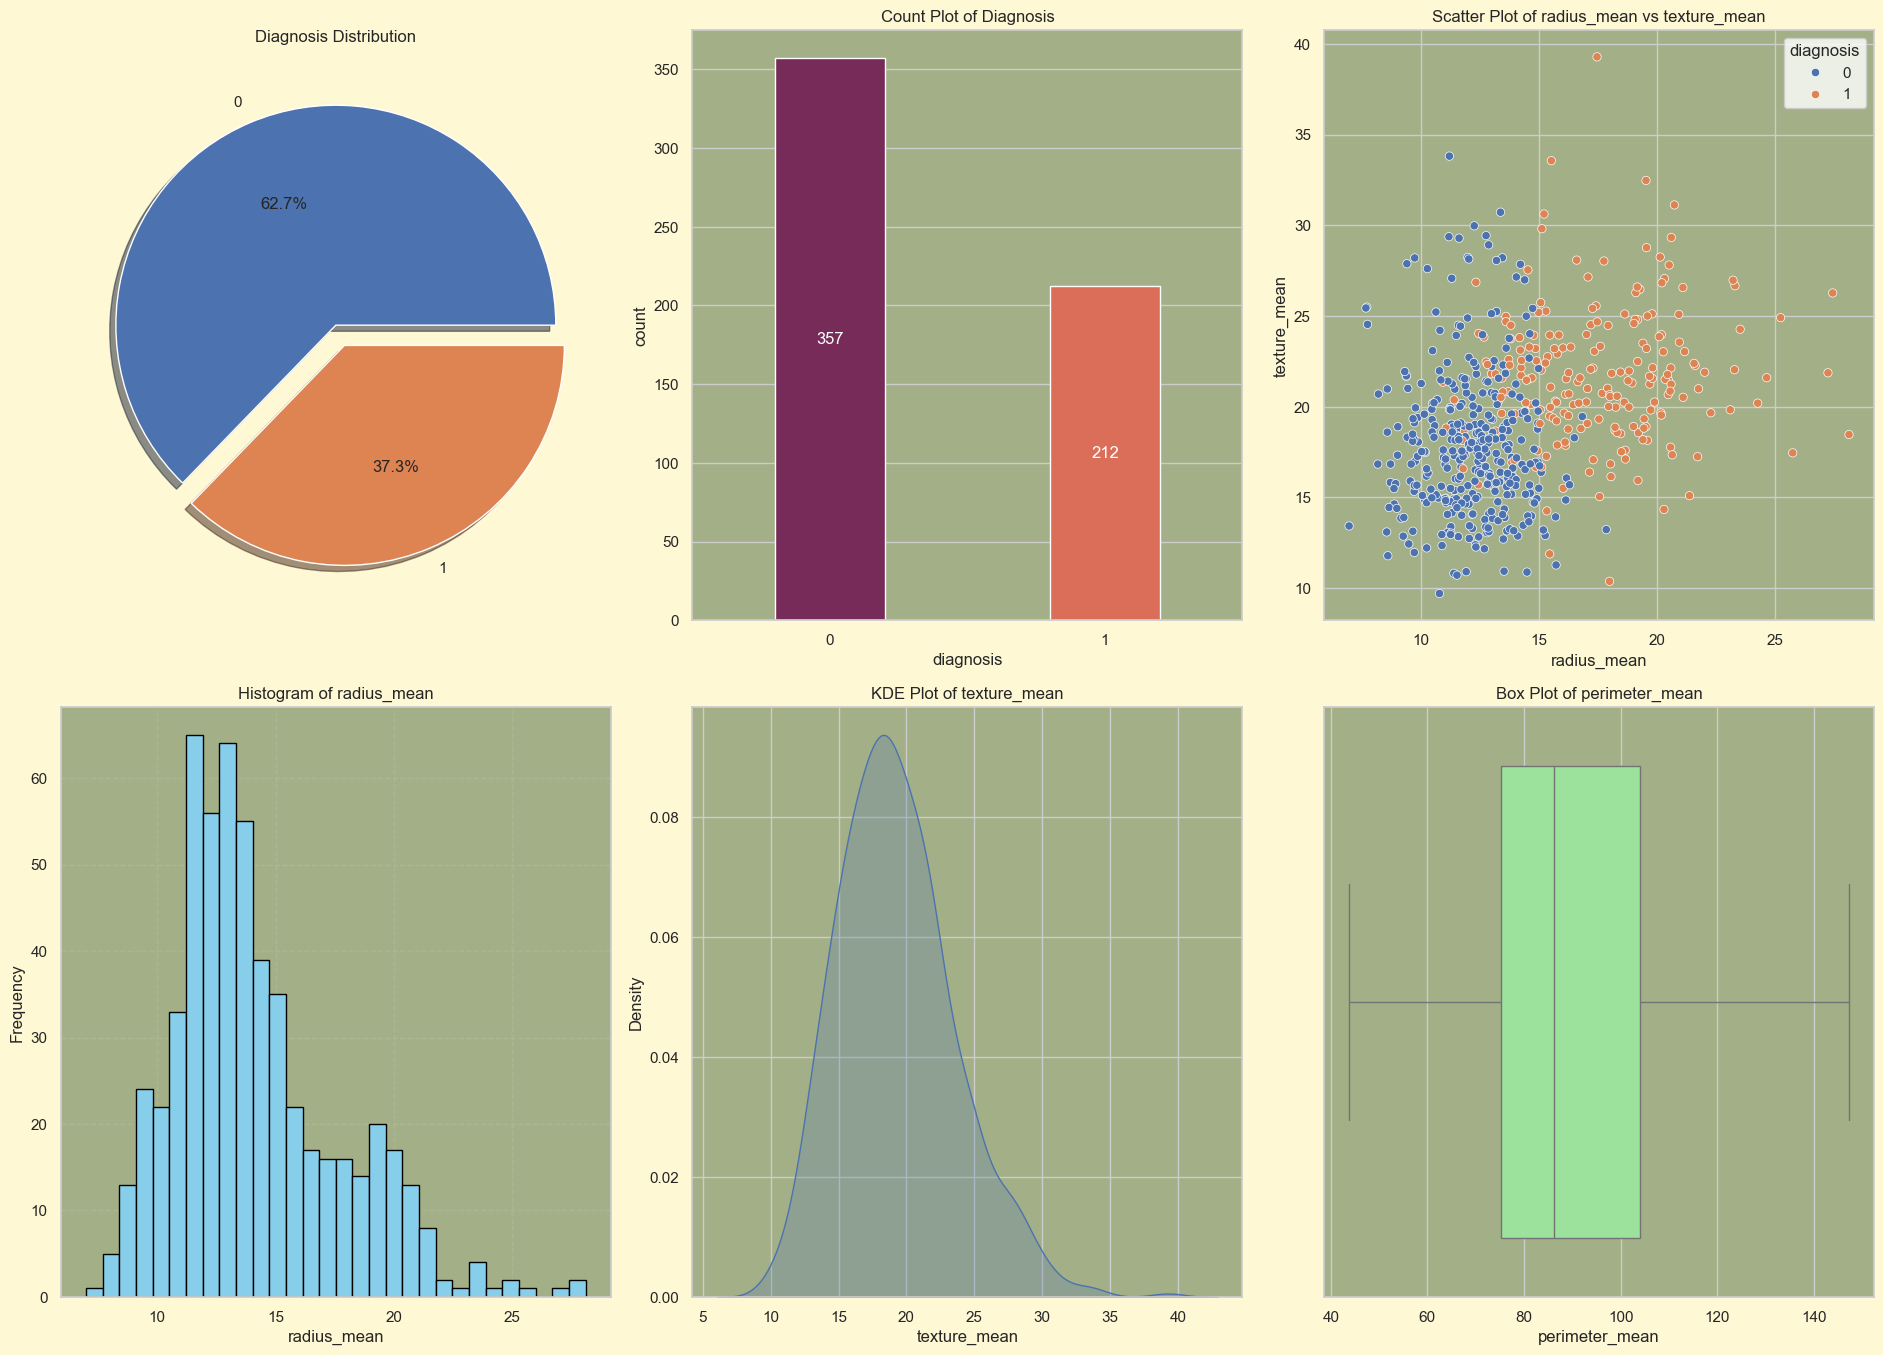

In [72]:
plt.figure(figsize=(19,20) , facecolor='#FFF8D4')
sns.set(style="whitegrid")
# plt.suptitle("Breast Cancer Analysis", fontsize=20, fontweight='bold')
plt.subplot(3,3,1)
plt.title("Diagnosis Distribution")
plt.pie(count.values,labels=count.index , autopct='%0.1f%%' , shadow=True , explode=(0,0.1))

plt.subplot(3,3,2)
plt.title("Count Plot of Diagnosis")
a =sns.countplot(x='diagnosis', data=Data , width=0.4 , palette='rocket')
for i in a.containers:
    a.bar_label(i , label_type='center',color = 'w')
plt.gca().set_facecolor('#A3B087')
    
plt.subplot(3,3,3)
sns.scatterplot(x='radius_mean' , y='texture_mean' , data=df , hue='diagnosis')
plt.title("Scatter Plot of radius_mean vs texture_mean")
plt.gca().set_facecolor('#A3B087')

plt.subplot(3,3,4)
plt.hist(Data['radius_mean'] , bins=30 , color='skyblue' , edgecolor='black')
plt.title("Histogram of radius_mean")
plt.xlabel("radius_mean")
plt.ylabel("Frequency")
plt.gca().set_facecolor('#A3B087')
plt.grid(True , linestyle = '--' , alpha = 0.2)


plt.subplot(3,3,5)
sns.kdeplot(x=df["texture_mean"], shade=True)
plt.title("KDE Plot of texture_mean")
plt.gca().set_facecolor('#A3B087')

plt.subplot(3,3,6)
sns.boxplot(x=df["perimeter_mean"] , color='lightgreen' ,showfliers=False)
plt.title("Box Plot of perimeter_mean")
plt.gca().set_facecolor('#A3B087')

plt.tight_layout()
plt.show()




In [14]:
Data['diagnosis'].unique()

array([1, 0])

In [15]:
x = Data.drop(columns=['diagnosis'])
y = Data.iloc[:,0]

In [16]:
from sklearn.model_selection  import train_test_split

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.7,random_state=2)

In [18]:
len(x_train)

398

In [19]:
len(x_test)

171

In [20]:
len(y_train)

398

In [21]:
len(y_test)

171

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
acc = 100*accuracy_score(y_pred , y_test)
acc

91.81286549707602